##    <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0b78c1">       ENSEMBLE TECHNIQUES PROJECT
    
 ##   &nbsp;


<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#0e92ea"> PROJECT CONTEXT

<font color=#000>
   
&nbsp;
    
<p style="font-size: 18px"> A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
          analyse all relevant customer data and develop focused customer retention programs.</p>

&nbsp;

   <span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#0e92ea"> PROJECT OBJECTIVE
   
&nbsp;
    
<p style="font-size: 18px">To build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
    customer retention.</p>

&nbsp;

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#0e92ea"> DATA DESCRIPTION</span>

       
       
&nbsp;       
       
 <span> <p style="font-size: 18px"> The data rows represent a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information such as - <p/></span>

&nbsp;       
       
 <span> <p style="font-size: 18px"> • <em> Customers who left within the last month – the column is called Churn </em><p/></span>
    
   <span> <p style="font-size: 18px"> • <em> Services signed up for – phone,internet,security,online backup, device
       protection,tech support,streaming TV movies etc. </em> </p></span>
      
           
       
       
    
  <span> <p style="font-size: 18px"> • <em> Customer account information – duration, contract, payment method, billing, monthly
      charges, and total charges </em> </p></span>
    
 <span> <p style="font-size: 18px">  • <em> Demographic info about customers – gender, age range, and if they have partners and dependents </em> <p/></span>


# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image  
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Import and warehouse data

In [2]:
df = pd.read_csv('TelcomCustomer-Churn.csv')

Load the entire dataset directly into pandas.

In [3]:
df.shape

(7043, 21)

### Size data is as follows :

Data has 7043 rows and 21  columns


## Merge all datasets

Since all the dataframe is loaded directly into pandas, therefore this is a single dataframe and no merging is required . 

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Display the loaded dataset.

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A quick glimpse of the data shows the nature of data and column entries in Categorical or Quantitative data. Discrepancies in categorical data and missing numerical values can be replaced or removed as necessary during data cleaning.

In [6]:
print("> Shape of the dataset:",df.shape)
print("\n> Size of data:",df.size)

> Shape of the dataset: (7043, 21)

> Size of data: 147903


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The different columns of data. For the purpose of Data Analysis, the columns not affecting the Dependent Variable (Ex. customerID) can be dropped as it does not affect the analysis results and prediction.

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data type of each column in the dataset. The data type can be changed if required.

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 2

# Data cleansing

In [9]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

The number of columns of each data type.

## Missing value treatment

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No column consists of NULL values as confirmed as the sum of isnull() function is zero.

In [11]:
dupes = df.duplicated()
sum(dupes)

0

In [12]:
df.isnull().values.any()  

False

There are no duplicates in the data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data type of each column along with number of non NULL entries.

## Converting Numerical Features From Object

In [14]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Check the different entries for the OnlineBackup column not visible here.

### Change the object variables to numerical by encoding

In [15]:
lb = LabelEncoder() 
df['gender'] = lb.fit_transform(df['gender'])

In [16]:
df['Partner'] = lb.fit_transform(df['Partner'])

In [17]:
df['Dependents'] = lb.fit_transform(df['Dependents'])

In [18]:
df['PhoneService'] = df['PhoneService'].astype('str')
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)

In [19]:
df['MultipleLines'] = df['MultipleLines'].astype('str')
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)

In [20]:
df['InternetService'] = df['InternetService'].astype('str')
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)

In [21]:
df['OnlineSecurity'] = df['OnlineSecurity'].astype('str')
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [22]:
df['OnlineBackup'] = df['OnlineBackup'].astype('str')
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [23]:
df['DeviceProtection'] = df['DeviceProtection'].astype('str')
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [24]:
df['TechSupport'] = df['TechSupport'].astype('str')
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [25]:
df['StreamingTV'] = df['StreamingTV'].astype('str')
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [26]:
df['StreamingMovies'] = df['StreamingMovies'].astype('str')
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [27]:
df['Contract'] = df['Contract'].astype('str')
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)

In [28]:
df['PaperlessBilling'] = df['PaperlessBilling'].astype('str')
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [29]:
df['PaymentMethod'] = df['PaymentMethod'].astype('str')
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [30]:
lb = LabelEncoder() 
df['Churn'] = lb.fit_transform(df['Churn'])

### Change the object variables to numerical

In [31]:
df['PhoneService'] = pd.to_numeric(df['PhoneService'])

In [32]:
df['MultipleLines'] = pd.to_numeric(df['MultipleLines'])

In [33]:
df['InternetService'] = pd.to_numeric(df['InternetService'])

In [34]:
df['OnlineSecurity'] = pd.to_numeric(df['OnlineSecurity'])

In [35]:
df['OnlineBackup'] = pd.to_numeric(df['OnlineBackup'])

In [36]:
df['DeviceProtection'] = pd.to_numeric(df['DeviceProtection'])

In [37]:
df['TechSupport'] = pd.to_numeric(df['TechSupport'])

In [38]:
df['StreamingTV'] = pd.to_numeric(df['StreamingTV'])

In [39]:
df['StreamingMovies'] = pd.to_numeric(df['StreamingMovies'])

In [40]:
df['Contract'] = pd.to_numeric(df['Contract'])

In [41]:
df['PaperlessBilling'] = pd.to_numeric(df['PaperlessBilling'])

In [42]:
df['PaymentMethod'] = pd.to_numeric(df['PaymentMethod'])

In [43]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.6,1


All the Yes/No entries and other entries are changed to binary or encoding scheme for better analysis.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


The TotalCharges column is still not changed to Numeric datatype.

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

#### Blank values are causing the error while changing as empty string cannot be changed to int.

In [ ]:
df.iloc[488]

In [46]:
df['TotalCharges'].isnull().values.any()

False

Here we see that the blank string is not listed as NaN therefore it does not show up while checking for NULL values using isnull()

#### Change TotalCharges column to numeric and replace blank cells with NaN

In [47]:
df['TotalCharges'] = df['TotalCharges'].astype('str')

In [48]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [49]:
df.iloc[488]

customerID          4472-LVYGI
gender                       0
SeniorCitizen                0
Partner                      1
Dependents                   1
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              1
OnlineSecurity               1
OnlineBackup                 0
DeviceProtection             1
TechSupport                  1
StreamingTV                  1
StreamingMovies              0
Contract                     2
PaperlessBilling             1
PaymentMethod                2
MonthlyCharges           52.55
TotalCharges               NaN
Churn                        0
Name: 488, dtype: object

Blank cells are replaced by NaN and we can drop or replace the NULL values.

In [50]:
# Original dataframe size
Original_size = df.size

# drop dataframe
df.dropna(inplace=True)

# New dataframe size
New_size=df.size

print("> Original size:",Original_size,"vs","New size:",New_size)

# Data drop impact analysis

Data_lost=100*((Original_size-New_size)/Original_size)
print("> Percentage of data lost",Data_lost,"%")
if Data_lost<=5:
    print("\n Negligible amount of data has been lost therefore, dropping NaN values is a good option here")
else:
    print("\n Considerable data has been lost,dropping data was not a good option. We need to impute data")

> Original size: 147903 vs New size: 147672
> Percentage of data lost 0.1561834445548772 %

 Negligible amount of data has been lost therefore, dropping NaN values is a good option here


In [51]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [52]:
df['TotalCharges'].isnull().values.any()

False

In [53]:
df.isnull().values.any()

False

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


All the categorical columns have been changed to appropriate numeric data type.

In [55]:
df = df.reset_index()

Reset the numbering of rows after dropping null values.

## Drop attribute/s if required using relevant functional knowledge

In [56]:
df.drop('customerID', axis=1,inplace =True)

The data set consists of columns such as customerID for example, as it does not influence the predicted outcome, we drop the column.

In [57]:
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,1,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,3,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [58]:
df.drop('index', axis=1,inplace =True)

Drop the index coulmn as well since it is not required.

In [59]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7028,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7029,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7030,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


The data is cleaned and fixed and finally ready for Data Anaysis and Extrapolation.

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 3

# Data analysis & visualisation

## Statistical Analysis

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.421928,0.493902,0.00,0.0000,0.000,1.0000,1.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00
OnlineSecurity,7032.0,0.286547,0.452180,0.00,0.0000,0.000,1.0000,1.00
OnlineBackup,7032.0,0.344852,0.475354,0.00,0.0000,0.000,1.0000,1.00


### Corelation

In [61]:
df.corr() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.009643,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.259030,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000938,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.177789,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.031272,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.094182,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.345068,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,0.036009,0.490912,0.469042,0.040033
InternetService,-0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.345068,1.000000,0.156493,0.307223,0.313420,0.164532,0.429616,0.426820,-0.288855,0.377644,-0.178655,0.905389,0.428212,0.316350
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.156493,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,0.162848,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.307223,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,0.096246,0.441529,0.510100,-0.082307


## Heat Map

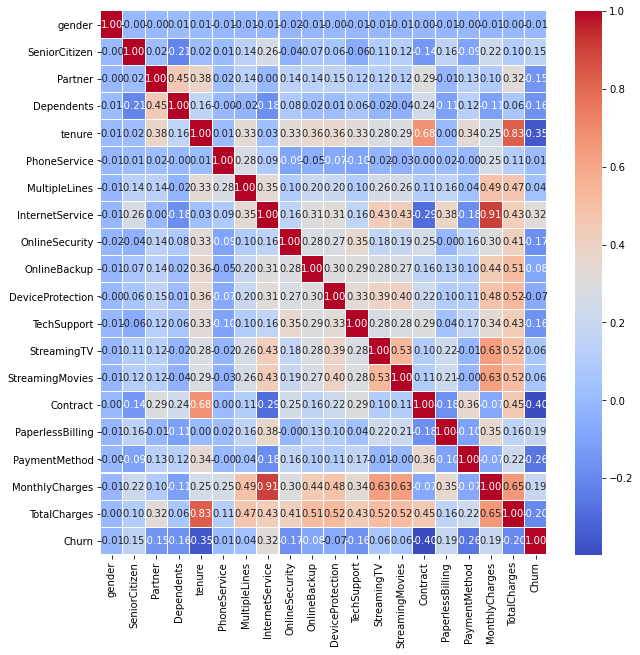

In [62]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="coolwarm")
plt.show()

Heat map showing the relationship of variables in graphical form. The diagonal is always 1 as it is the variable against itself. Redder parts show high correlation and blue lower.

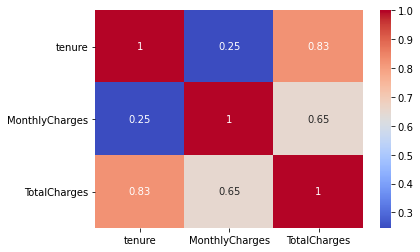

In [63]:
sns.heatmap(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap='coolwarm');

As evident from the correlation matrix and regplots, since 'TotalCharges' is the total monthly charges over the tenure of a customer, it is highly correlated with 'MonthlyCharges' and 'tenure'.

### Pairplot

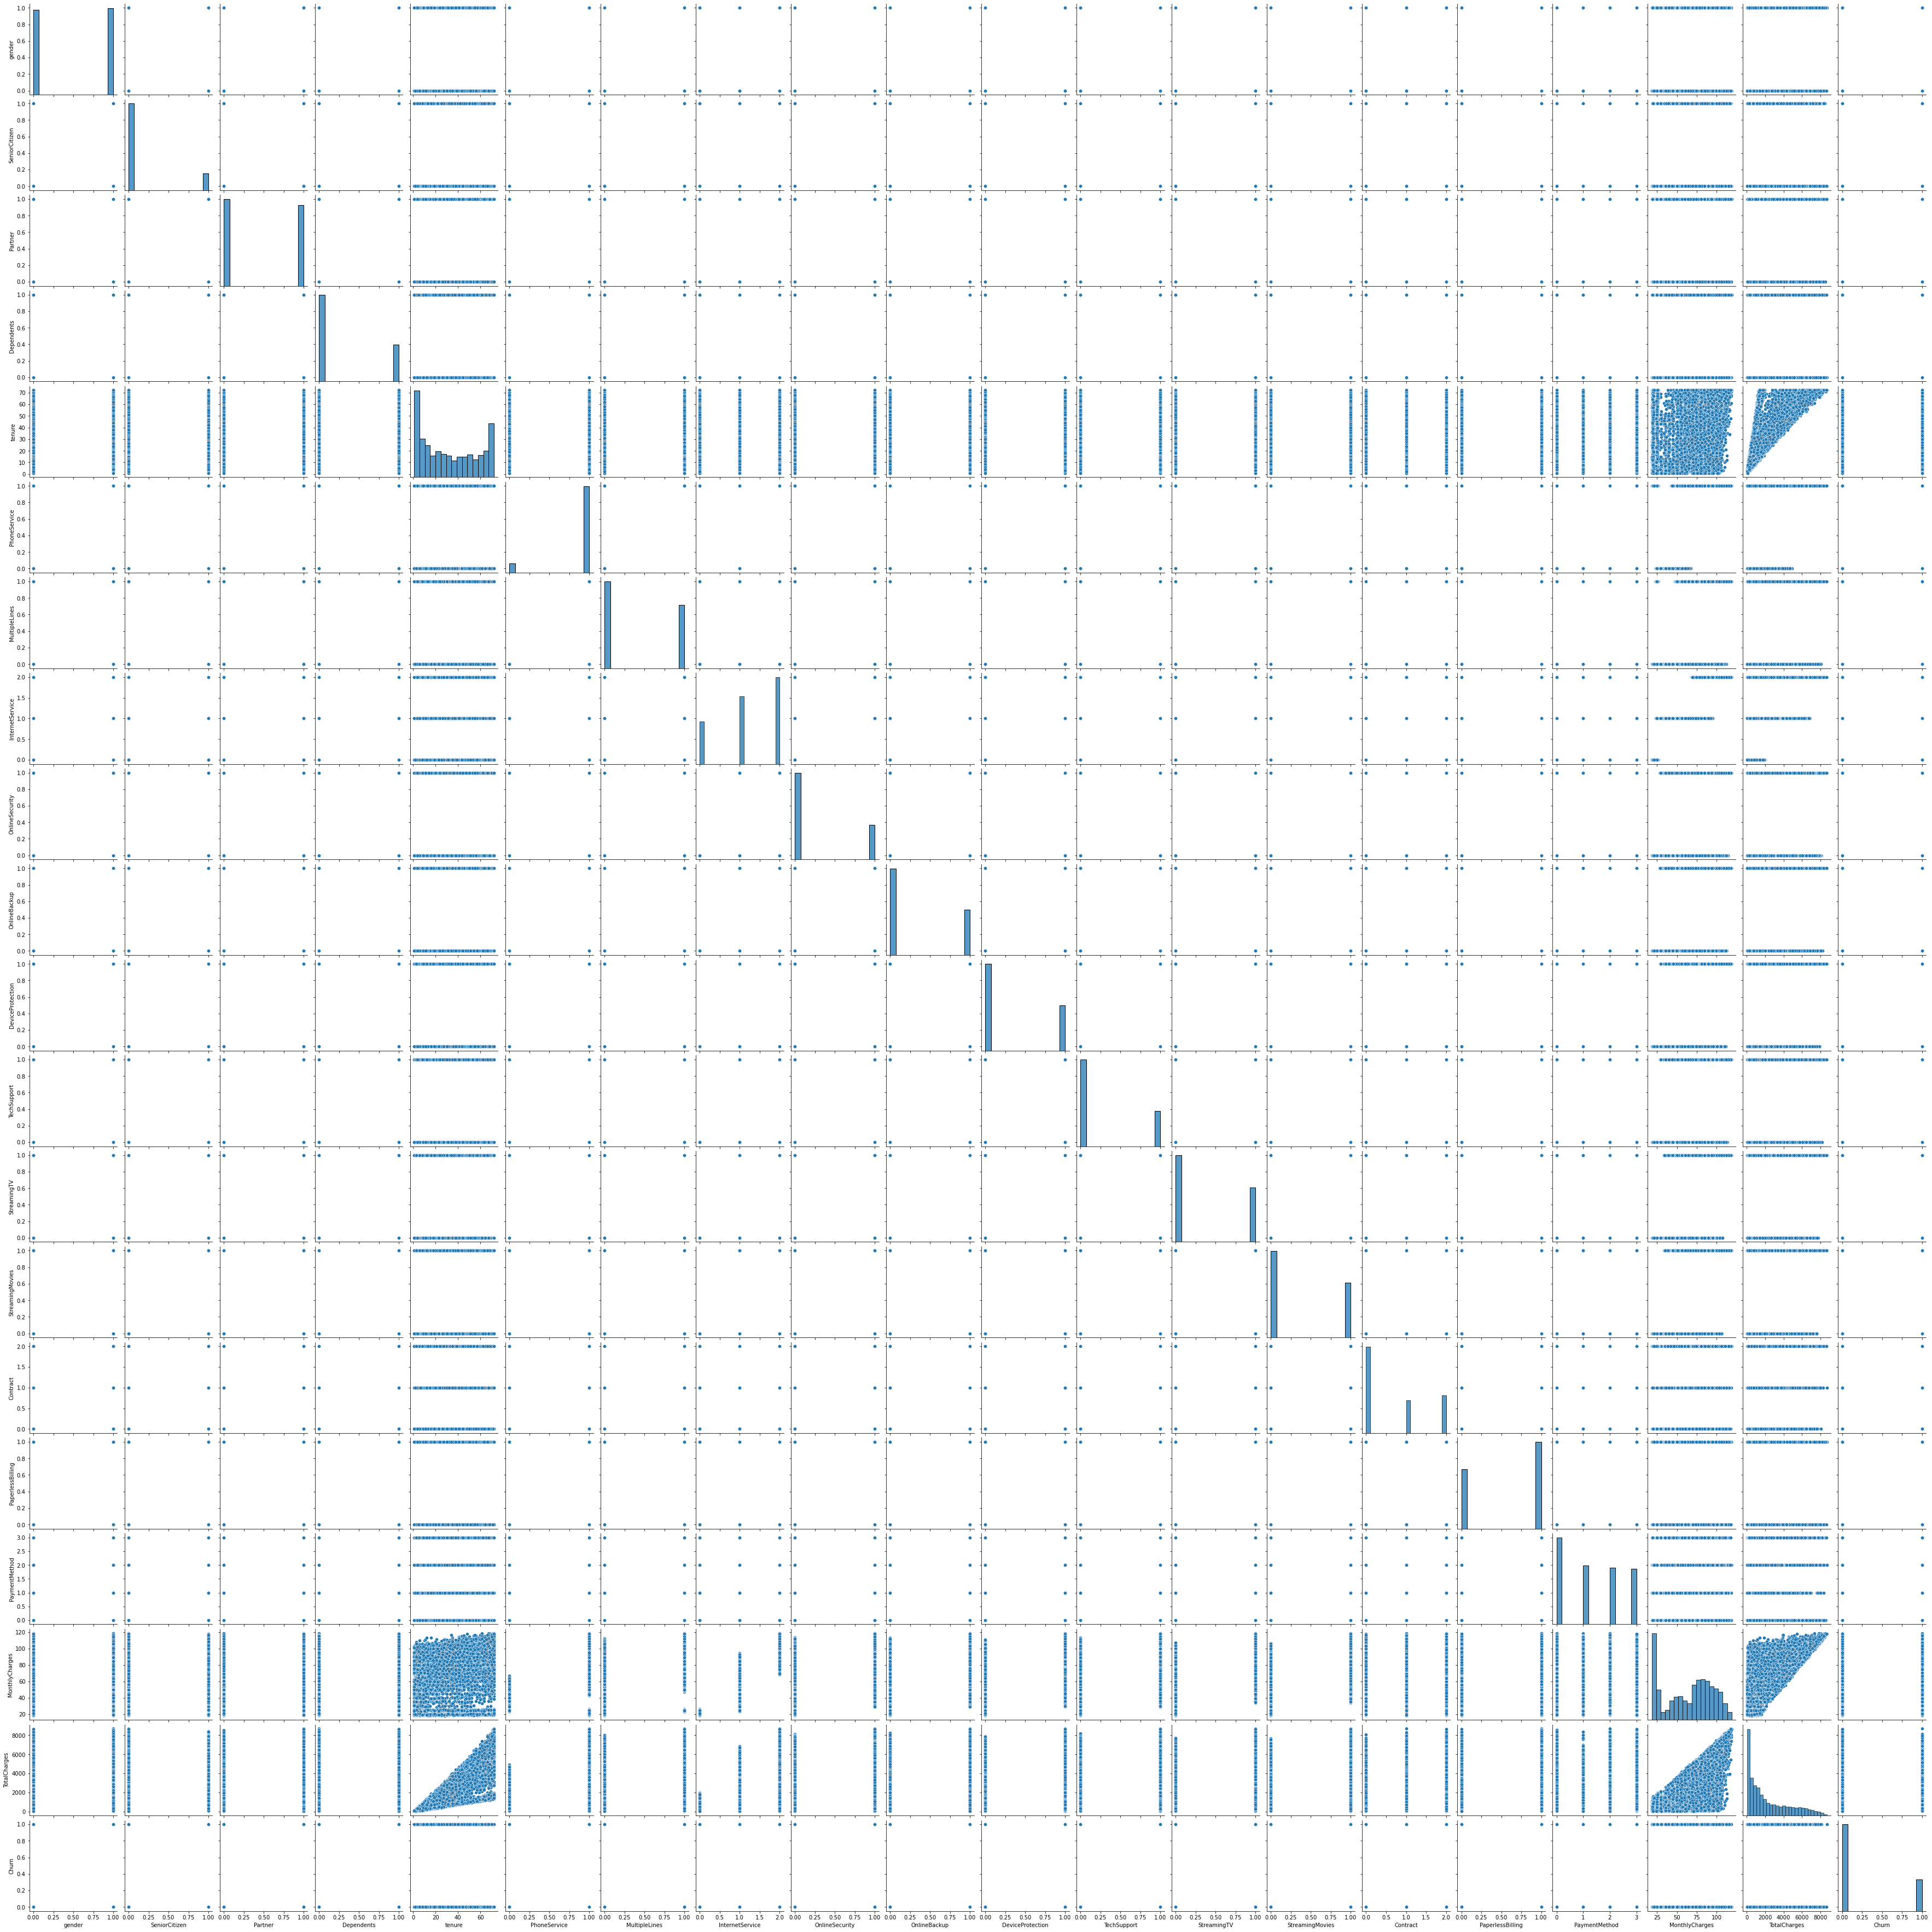

In [64]:
sns.pairplot(df)

This is a graphical representation of the co-relations between the variables. This Plot shows pairwise relationships in a dataset.

### Correlation of "Churn" with other variables

<AxesSubplot:>

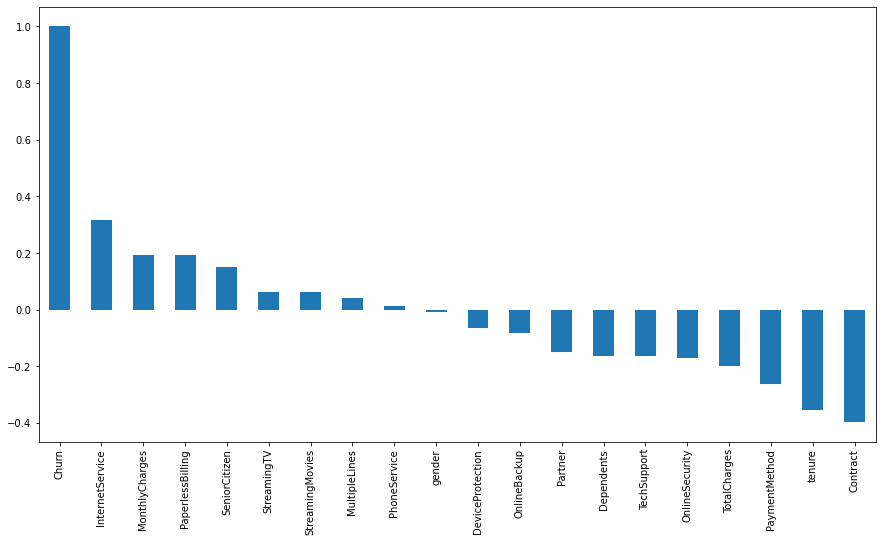

In [65]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support are positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Online security, streaming TV, online backup, tech support, etc. without internet connection are negatively related to churn.

### Gender Distribution of Customers

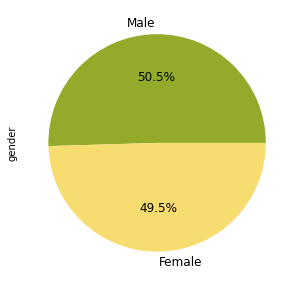

In [66]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#94aa2a','#F7DC6F']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12,colors = colors )



<AxesSubplot:xlabel='gender', ylabel='count'>

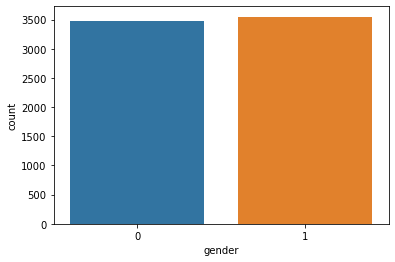

In [67]:
sns.countplot(df['gender'])

About half of the customers in our data set are male while the other half are female. No significant difference in gender variable.

### Number of Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

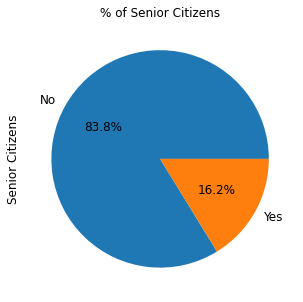

In [68]:

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)



Majority of the customers are not senior citizens, most of our customers in the data are younger people. Senior citizens with less technical know how may tend to leave the service dissatisfied.

## Tenure of Customers

Text(0.5, 1.0, '# of Customers by their tenure')

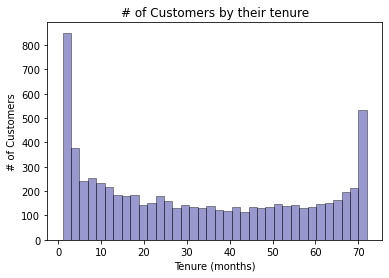

In [69]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

This histogram shows that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay or leave the company. New customers are satisfied with starting benefits and discount but may be dissatisfied later.

## Churn Rate

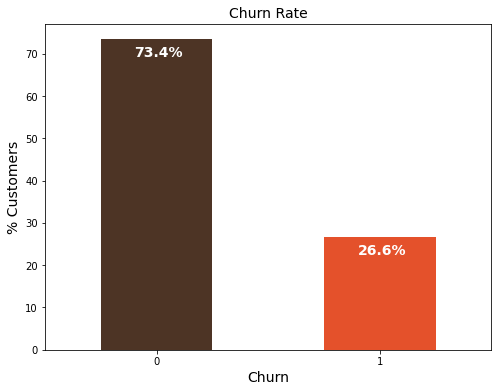

In [70]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

About 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

## Customers by Contract Type

Text(0.5, 1.0, '# of Customers by Contract Type')

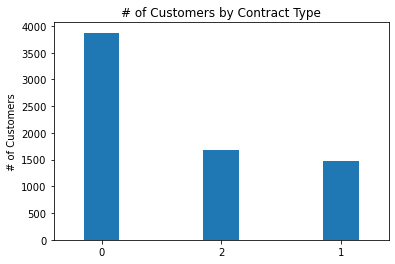

In [71]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Most of the customers are in the month to month contract. While there are about equal number of customers in the 1 year and 2 year contracts. As said earlier, long term customers are satisfied with the services and don't plan to leave.

Text(0.5, 1.0, 'Two Year Contract')

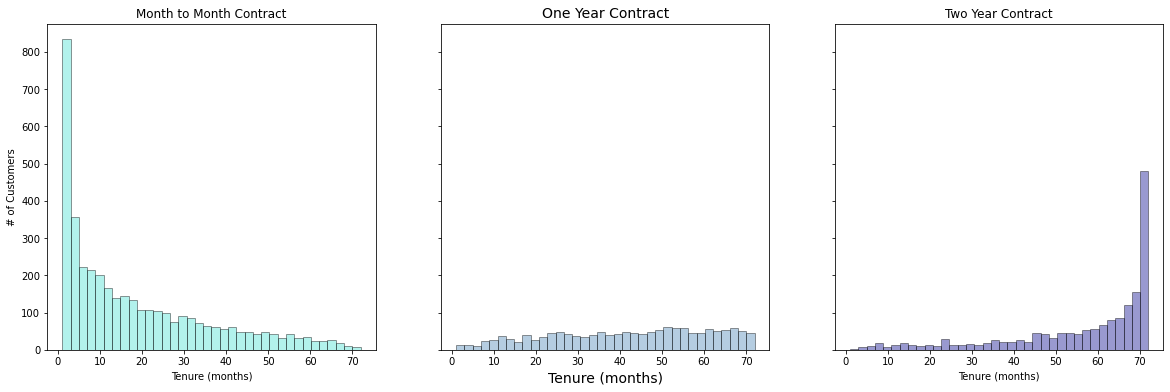

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']== 0]['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']== 1]['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']== 2]['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

## Monthly Charges Distribution

<AxesSubplot:title={'center':'Distribution Plot For Monthly Charges'}, xlabel='MonthlyCharges', ylabel='Density'>

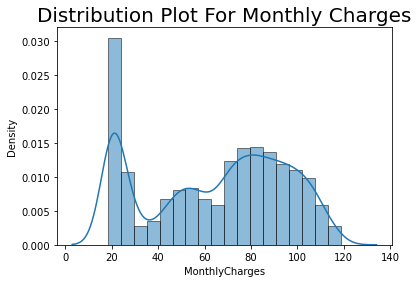

In [73]:
plt.title("Distribution Plot For Monthly Charges",size=20)
sns.distplot(df['MonthlyCharges'],hist_kws={'edgecolor':'black','alpha':.5})

Uneven distribution with high concentration at start.

## Total Charges Distribution

<AxesSubplot:title={'center':'Distribution Plot For TotalCharges'}, xlabel='TotalCharges', ylabel='Density'>

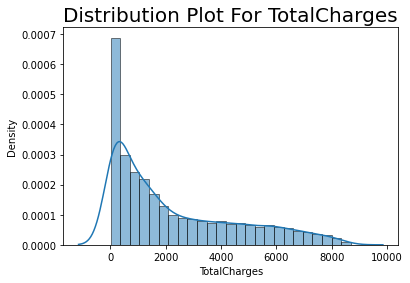

In [74]:
plt.title("Distribution Plot For TotalCharges",size=20)
sns.distplot(df['TotalCharges'],hist_kws={'edgecolor':'black','alpha':.5})

Total charges has a right skewed distribution. High disparity in data.

## Relation between Monthly and Total charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

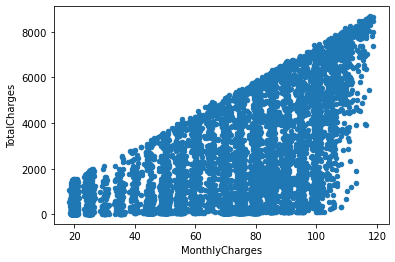

In [75]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

The total charges increase simultaneously as the monthly bill of a customer increases. A sense of consistency and uniformity is shown throughout as the distribution progresses.

## Churn vs Tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

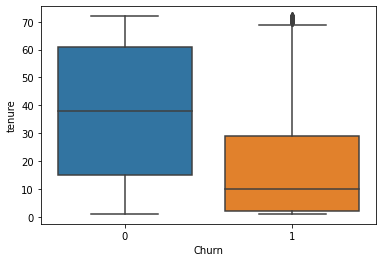

In [76]:
sns.boxplot(x = df.Churn, y = df.tenure)

As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

## Churn by Contract Type

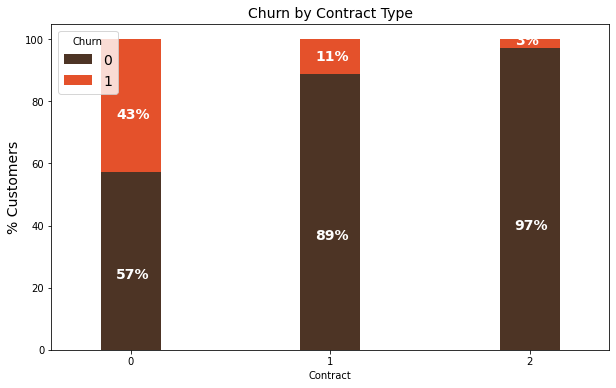

In [77]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Similar to the correlation plot, the customers who have a month to month contract have a very high churn rate.

## Churn by Seniority

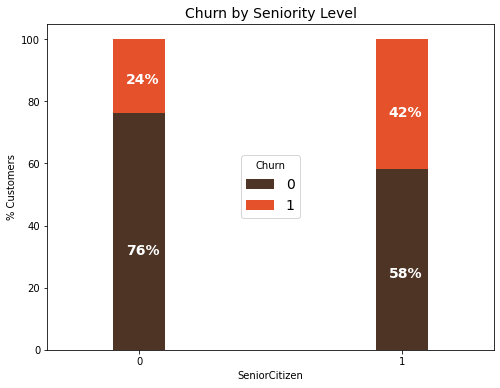

In [78]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)

ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Senior Citizens have almost double the churn rate than younger population. These senior customers may not be tech savvy or not want additional services and charges.

## Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

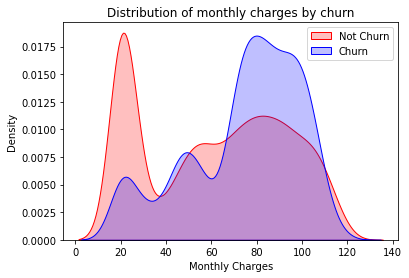

In [79]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

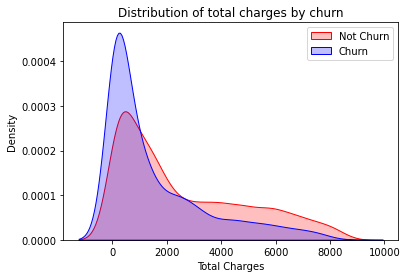

In [80]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Higher percentage of customers churn when the monthly charges are high. It seems that there is higher churn when the total charges are lower.

## Distribution of various services used by customers

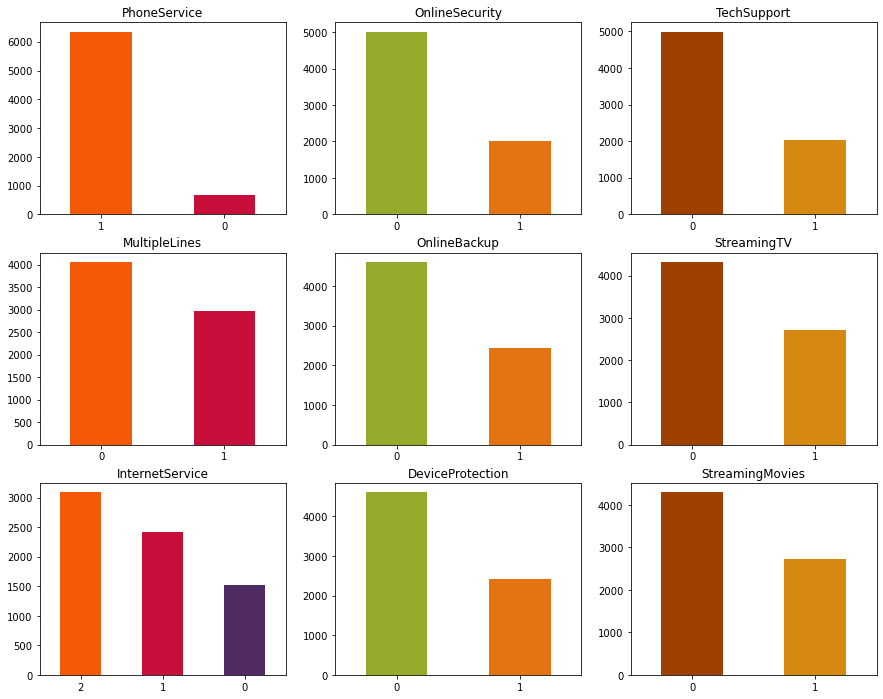

In [81]:
features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors1 =['#f45905','#c70d3a','#512c62']
colors2 =['#94aa2a','#e47312','#d55252']
colors3= ['#A04000','#D68910','#F7DC6F']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(features):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=colors1)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = colors2)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=colors3)
    ax.set_title(item)

Phone service has the hishest discrepancy. Most customers do not opt for special services. High polarity is shown in all services, no equal distribution can be found.

## Customers with different tenure

<AxesSubplot:title={'center':'Customer Count wrt to tenure'}, xlabel='tenure_group', ylabel='count'>

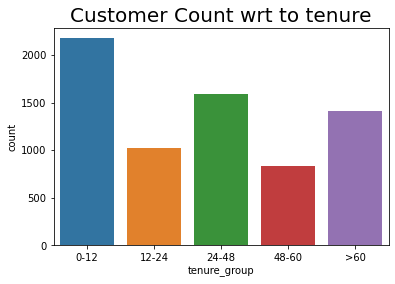

In [82]:
tempdf = df.copy()
bins=[0,12,24,48,60,100]
tempdf['tenure_group']=pd.cut(tempdf['tenure'],bins,labels=['0-12','12-24','24-48','48-60','>60'])
plt.title('Customer Count wrt to tenure',size=20)
sns.countplot(tempdf['tenure_group'])

The first group has the highest customers. These are likely new customers therefore satisfied with the services. The Second group is significantly lower than the first as most customers leave after initial use for various reasons. Third group is stable and fourth is lowest and last group has most long tome customers.

## Churn w.r.t Charges and Tenure

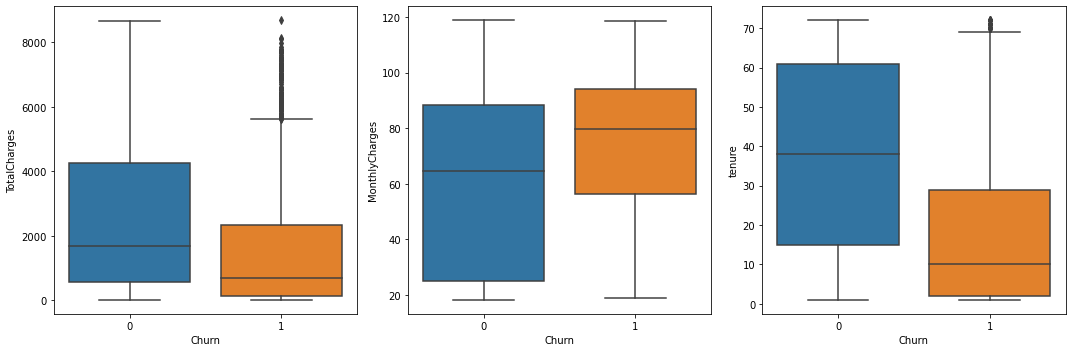

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot(x='Churn', y=cols[i], data=df, ax=axes[i])
fig.tight_layout()

## Churn w.r.t Contract

Contract,0,1,2
Churn,,,
0,2220,1306,1637
1,1655,166,48


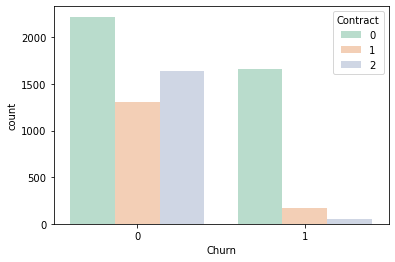

In [84]:
display(pd.crosstab(df['Churn'], df['Contract'], dropna=False))
sns.countplot(x='Churn', hue='Contract', data=df, palette='Pastel2')

# Put the legend out of the figure
plt.legend(title='Contract', bbox_to_anchor=(1, 1));

### Some conclusions from the Data Analysis are as follows :

• Month to month contract is more likely opted by customers. As for most customers it may be convinient and easy for cancellation.

• Tech Support is not taken by maximum customers and customers who do not have Internet Service do not belong to any category.

• Fiber optic cable is most common internet service. There is large population which doesn’t have internet service as well.

• Senior Citizens churn slightly more than Non-Senior Citizens, alluding to a difference in service preference in the age          categories.

• Non-Dependent Customers churn more than Dependent Customers.

• Customers with Fiber optic Internet Service churn highest as compared to DSL and no Internet Service customers.

• Customers with No Online Security Churn way more than customers that do have Online Security.


• Target class is an imbalanced class with most of the customers as Non-Churners.



    
• With regard to the tenure, the clients on either extreme endare more likely to churn compared to those that are of average tenure.


# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 4

# Data pre-processing

## Segregate predictors vs target attributes

In [85]:
X_df = df.loc[:, df.columns != 'Churn']
y_df = df['Churn']

## Check for target balancing and fix it if found imbalanced

In [86]:
# Check for target balancing and fix it if found imbalanced.
y_df.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [87]:
# Up-sample

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[y_df==0]
df_minority = df[y_df==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4400,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Churn'].value_counts()

0    5163
1    4400
Name: Churn, dtype: int64

In [88]:
# top 5 rows fo the dataframe
df_upsampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
6,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.90,0


In [89]:
# Shape and size of the dataframe
print("> Shape:",df_upsampled.shape)
print("\n> Size:",df_upsampled.size)

> Shape: (9563, 20)

> Size: 191260


In [90]:
# Down-sample

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[y_df==0]
df_minority = df[y_df==1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=600,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['Churn'].value_counts()

1    1869
0     600
Name: Churn, dtype: int64

In [91]:
# top 5 rows fo the dataframe
df_downsampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5383,1,0,1,1,63,0,0,1,0,1,1,1,0,0,2,0,2,39.35,2395.05,0
4814,1,0,1,1,72,1,0,2,1,0,1,1,1,1,2,1,3,104.90,7559.55,0
2550,0,0,0,0,8,1,0,1,1,0,0,0,1,0,0,1,0,60.00,487.75,0
6004,0,1,1,0,50,1,1,2,0,0,0,1,1,1,1,1,0,100.65,5189.75,0
6254,0,0,0,0,25,0,0,1,0,0,1,1,1,1,1,0,0,54.20,1423.15,0


In [92]:
# Shape and size of the dataframe
print("> Shape:",df_downsampled.shape)
print("\n> Size:",df_downsampled.size)

> Shape: (2469, 20)

> Size: 49380


## Perform train-test split

In [93]:
#Segregate predictors vs target attributes

X_df = df_upsampled.loc[:, df.columns != 'Churn']  # choose appropriate dataframe
y_df = df_upsampled['Churn']

In [94]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_df,y_df,test_size = 0.3, random_state=1)

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 5

# Model training, testing and tuning

# Upsampled Data

### LOGISTIC REGRESSION MODEL

In [197]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(x_train, y_train)

model_score = model.score(x_train, y_train)
y_predict = model.predict(x_train)
print("\nTrain accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = model.score(x_test, y_test)
y_predict = model.predict(x_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))


Train accuracy: 77.22 %

Confusion matrix:

 [[2764  860]
 [ 665 2405]]

Test accuracy: 75.95 %

Confusion matrix:

 [[1181  358]
 [ 332  998]]


In [198]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1539
           1       0.74      0.75      0.74      1330

    accuracy                           0.76      2869
   macro avg       0.76      0.76      0.76      2869
weighted avg       0.76      0.76      0.76      2869



<AxesSubplot:>

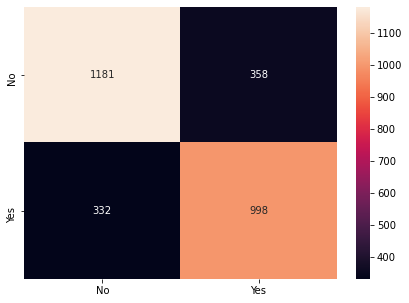

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

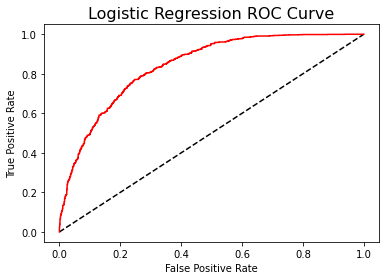

In [128]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### SUPPORT VECTOR MACHINE

In [140]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3)    
clf.fit(x_train , y_train)



model_score = model.score(x_train, y_train)
y_predict = clf.predict(x_train)
print("\nTrain accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = model.score(x_test, y_test)
y_predict = clf.predict(x_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))




Train accuracy: 77.22 %

Confusion matrix:

 [[3427  197]
 [  44 3026]]

Test accuracy: 75.95 %

Confusion matrix:

 [[1294  245]
 [ 148 1182]]


In [141]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1539
           1       0.83      0.89      0.86      1330

    accuracy                           0.86      2869
   macro avg       0.86      0.86      0.86      2869
weighted avg       0.87      0.86      0.86      2869



<AxesSubplot:>

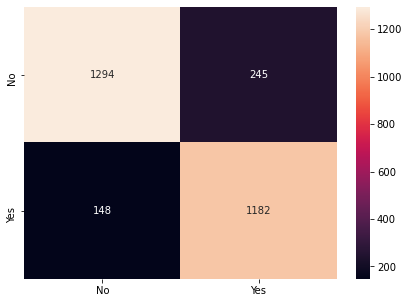

In [195]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = clf.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

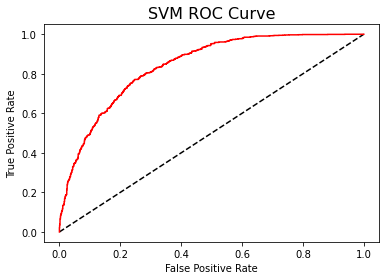

In [143]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve',fontsize=16)
plt.show();

###  NAIVE BAYES CLASSIFIER

In [219]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

model_score = model.score(x_train, y_train)
y_predict = model.predict(x_train)
print("\nTrain accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = model.score(x_test, y_test)
y_predict = model.predict(x_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))


Train accuracy: 75.81 %

Confusion matrix:

 [[2630  994]
 [ 625 2445]]

Test accuracy: 74.52 %

Confusion matrix:

 [[1123  416]
 [ 315 1015]]


In [220]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1539
           1       0.71      0.76      0.74      1330

    accuracy                           0.75      2869
   macro avg       0.75      0.75      0.74      2869
weighted avg       0.75      0.75      0.75      2869



<AxesSubplot:>

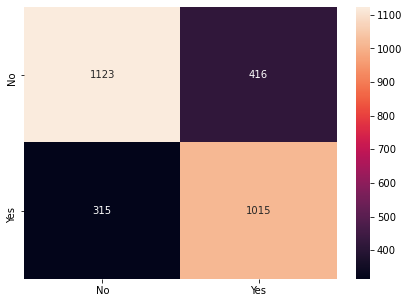

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

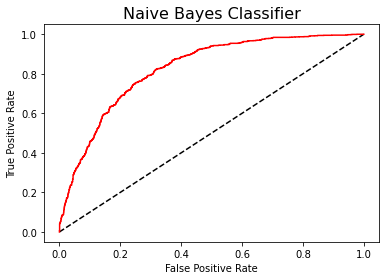

In [146]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Naive Bayes Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Classifier',fontsize=16)
plt.show();

###  K- NEAREST NEIGHBOUR

In [180]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=99)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [181]:
# Display the classification accuracies for train and test data.
print("{} KNN score:{}".format(3,knn.score(X_test,y_test)))

3 KNN score:0.7671662600209133


In [182]:
# Design a function which can suggest the best value of K for the dataset along with elbow plot

def KNN_NEIGHBOR():   
    # KNN - choosing the K value
    from sklearn.metrics import accuracy_score

    # creating odd list of K for KNN
    myList = list(range(2,15))  # k=arange(1,20,2)

    # subsetting just the odd ones
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold accuracy scores
    ac_scores = []

    # perform accuracy metrics for values from 1,3,5....19
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        # predict the response
        y_pred = knn.predict(X_test)
        # evaluate accuracy
        scores = accuracy_score(y_test, y_pred)
        ac_scores.append(scores)

    # changing to misclassification error
    MSE = [1 - x for x in ac_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print("The optimal number of neighbors is %d" % optimal_k)

In [183]:
KNN_NEIGHBOR()

The optimal number of neighbors is 3


In [184]:
# Design a function which can train the KNN model and display the accuracies and classification report.
def KNN_CLASSIFIER(k):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    y_pred1 = knn.predict(X_test)
    scores1 = accuracy_score(y_train, y_pred)
    scores2 = accuracy_score(y_test, y_pred1)
    print("The KNN model has been trained")
    print("\n\nTrain Accuracy:",scores1)
    print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_pred))
    print("\n\nTest Accuracy:",scores2)
    print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_pred1))

In [185]:
KNN_CLASSIFIER(3)

The KNN model has been trained


Train Accuracy: 0.8852703913952794

Confusion matrix:

 [[3015  581]
 [ 187 2911]]


Test Accuracy: 0.7671662600209133

Confusion matrix:

 [[1125  442]
 [ 226 1076]]


In [186]:
# Display and explain the classification report in detail.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1567
           1       0.71      0.83      0.76      1302

    accuracy                           0.77      2869
   macro avg       0.77      0.77      0.77      2869
weighted avg       0.78      0.77      0.77      2869



<AxesSubplot:>

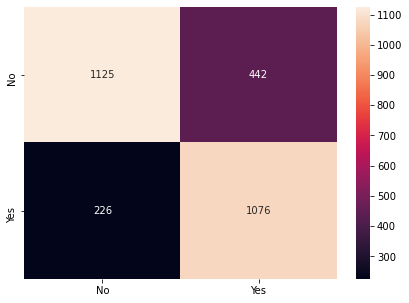

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred1 = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

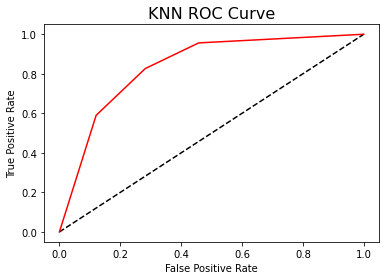

In [188]:
from sklearn.metrics import roc_curve

y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show();

### DECISION TREE

In [230]:
# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.30, random_state=1)

In [232]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree train accuracy is :",accuracy_dt)


Decision Tree train accuracy is : 0.841756709654932


## Reducing over fitting (Regularization)

In [233]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7587391694054377
0.7452073893342628


In [234]:
print(classification_report(y_test,predictdt_y))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1539
           1       0.79      0.90      0.84      1330

    accuracy                           0.84      2869
   macro avg       0.85      0.85      0.84      2869
weighted avg       0.85      0.84      0.84      2869



<AxesSubplot:>

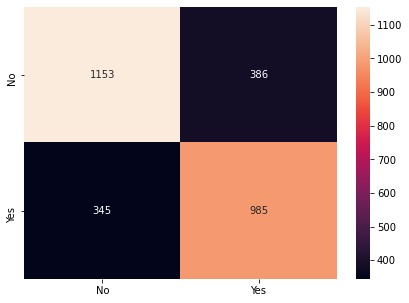

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


predictdt_y = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, predictdt_y, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

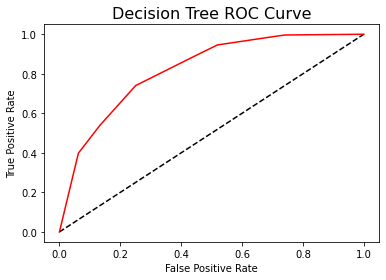

In [241]:
predictdt_y_prob = dTreeR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictdt_y_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show();

#### Displaying the Decision Tree

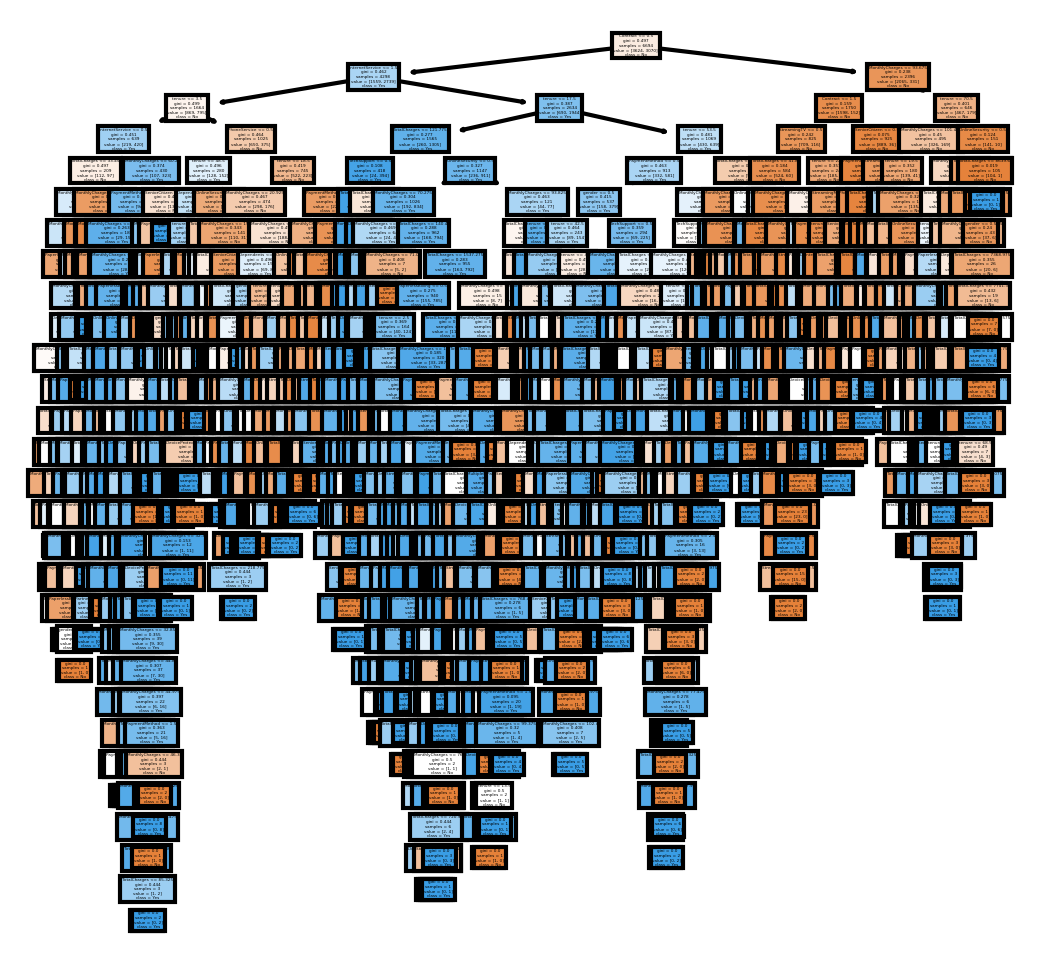

In [163]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

##   RandomForest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7647263855001742


In [249]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1539
           1       0.75      0.74      0.74      1330

    accuracy                           0.76      2869
   macro avg       0.76      0.76      0.76      2869
weighted avg       0.76      0.76      0.76      2869



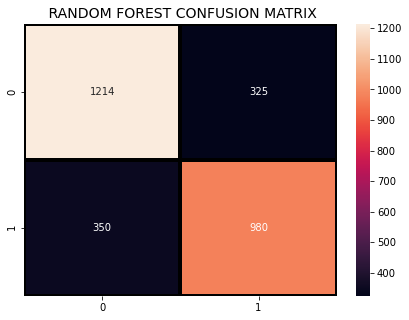

In [256]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

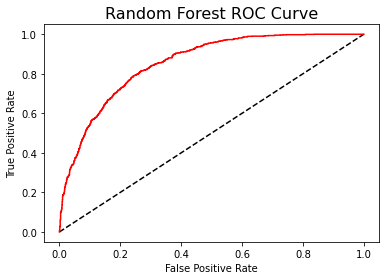

In [260]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

###                            Ensemble Technique - Bagging

In [261]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8787033809689787


<AxesSubplot:>

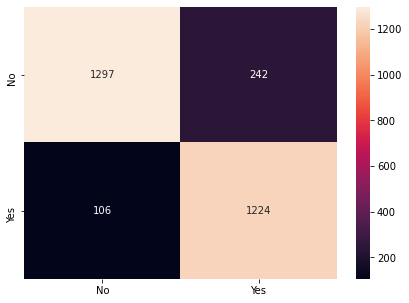

In [262]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Technique - AdaBoosting

In [263]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7490414778668526


<AxesSubplot:>

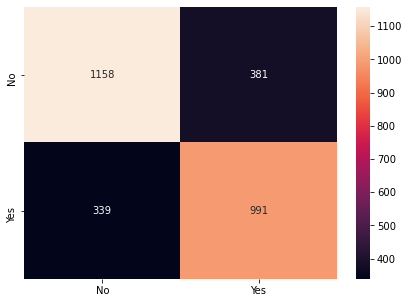

In [264]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

###                     Ensemble Technique - GradientBoost

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7668177065179506


<AxesSubplot:>

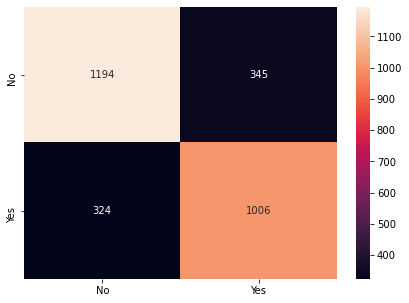

In [266]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Voting Classifier

In [267]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier(n_estimators=10, random_state=1)
clf4 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
clf5 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3), ('rf', clf4), ('gnb', clf5)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7908678982223771


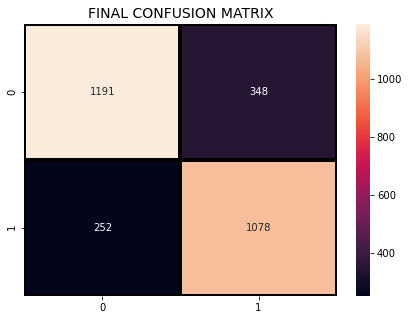

In [268]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

Now training the models with the original data.

# Original Data

In [370]:
#Segregate predictors vs target attributes

X_df1 = df.loc[:, df.columns != 'Churn']  # choose appropriate dataframe
y_df1 = df['Churn']

In [371]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_df1,y_df1,test_size = 0.3, random_state=1)

### LOGISTIC REGRESSION MODEL

In [372]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model1 = LogisticRegression()
model1.fit(x_train, y_train)

model1_score = model1.score(x_train, y_train)
y_predict = model1.predict(x_train)
print("\nTrain accuracy:",round(100*model1_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score1 = model1.score(x_test, y_test)
y_predict = model1.predict(x_test)

print("\nTest accuracy:",round(100*model1_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))


Train accuracy: 80.62 %

Confusion matrix:

 [[3245  363]
 [ 591  723]]

Test accuracy: 80.62 %

Confusion matrix:

 [[1397  158]
 [ 251  304]]


In [282]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1555
           1       0.66      0.55      0.60       555

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



<AxesSubplot:>

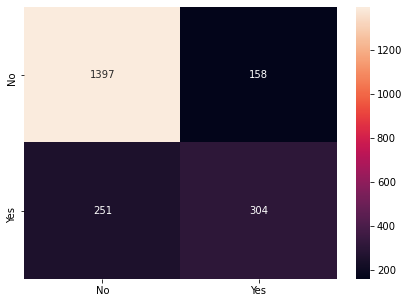

In [283]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

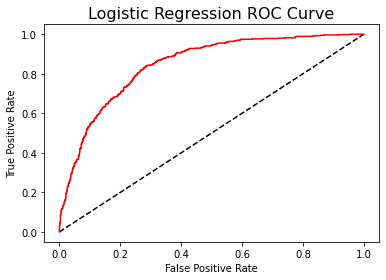

In [284]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### SUPPORT VECTOR MACHINE

In [375]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3)    
clf.fit(x_train , y_train)



model_score = model.score(x_train, y_train)
y_predict = clf.predict(x_train)
print("\nTrain accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = model.score(x_test, y_test)
y_predict = clf.predict(x_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))




Train accuracy: 76.29 %

Confusion matrix:

 [[3524   84]
 [ 104 1210]]

Test accuracy: 77.3 %

Confusion matrix:

 [[1387  168]
 [ 328  227]]


In [367]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1555
           1       0.57      0.41      0.48       555

    accuracy                           0.76      2110
   macro avg       0.69      0.65      0.66      2110
weighted avg       0.75      0.76      0.75      2110



<AxesSubplot:>

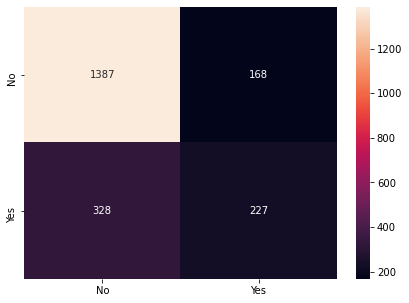

In [287]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = clf.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

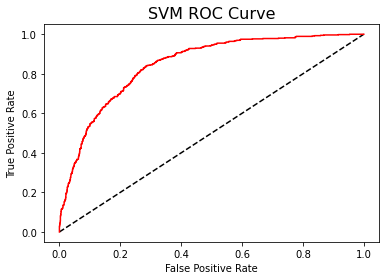

In [288]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve',fontsize=16)
plt.show();

###  NAIVE BAYES CLASSIFIER

In [369]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)

model3_score3 = model3.score(x_train, y_train)
y_predict = model3.predict(x_train)
print("\nTrain accuracy:",round(100*model3_score3,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model3_score4 = model3.score(x_test, y_test)
y_predict = model3.predict(x_test)

print("\nTest accuracy:",round(100*model3_score4,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))


Train accuracy: 76.29 %

Confusion matrix:

 [[2796  812]
 [ 355  959]]

Test accuracy: 77.3 %

Confusion matrix:

 [[1212  343]
 [ 136  419]]


In [290]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1555
           1       0.55      0.75      0.64       555

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.74      2110
weighted avg       0.81      0.77      0.78      2110



<AxesSubplot:>

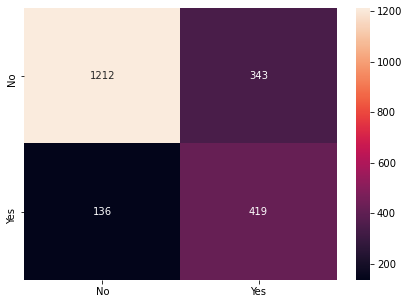

In [291]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

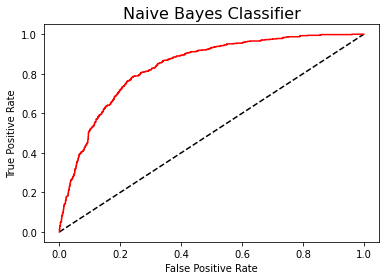

In [292]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Naive Bayes Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Classifier',fontsize=16)
plt.show();

###  K- NEAREST NEIGHBOUR

In [320]:
# KNN


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knn.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0])

In [321]:
# Display the classification accuracies for train and test data.
print("{} KNN score:{}".format(3,knn.score(x_test,y_test)))

3 KNN score:0.6507109004739337


In [322]:
# Design a function which can suggest the best value of K for the dataset along with elbow plot

def KNN_NEIGHBOR():   
    # KNN - choosing the K value
    from sklearn.metrics import accuracy_score

    # creating odd list of K for KNN
    myList = list(range(2,15))  # k=arange(1,20,2)

    # subsetting just the odd ones
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold accuracy scores
    ac_scores = []

    # perform accuracy metrics for values from 1,3,5....19
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        # predict the response
        y_pred = knn.predict(x_test)
        # evaluate accuracy
        scores = accuracy_score(y_test, y_pred)
        ac_scores.append(scores)

    # changing to misclassification error
    MSE = [1 - x for x in ac_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print("The optimal number of neighbors is %d" % optimal_k)

In [323]:
KNN_NEIGHBOR()

The optimal number of neighbors is 13


In [324]:
# Design a function which can train the KNN model and display the accuracies and classification report.
def KNN_CLASSIFIER(k):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_train)
    y_pred1 = knn.predict(x_test)
    scores1 = accuracy_score(y_train, y_pred)
    scores2 = accuracy_score(y_test, y_pred1)
    print("The KNN model has been trained")
    print("\n\nTrain Accuracy:",scores1)
    print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_pred))
    print("\n\nTest Accuracy:",scores2)
    print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_pred1))

In [325]:
KNN_CLASSIFIER(13)

The KNN model has been trained


Train Accuracy: 0.7348638764729785

Confusion matrix:

 [[3511   74]
 [1231  106]]


Test Accuracy: 0.723696682464455

Confusion matrix:

 [[1504   74]
 [ 509   23]]


In [330]:
# Display and explain the classification report in detail.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1578
           1       0.27      0.18      0.22       532

    accuracy                           0.67      2110
   macro avg       0.51      0.51      0.50      2110
weighted avg       0.63      0.67      0.65      2110



<AxesSubplot:>

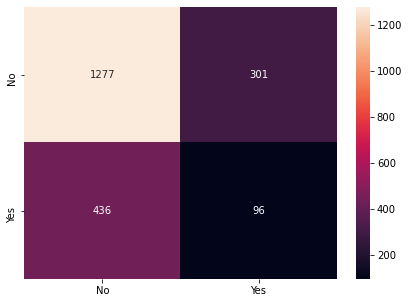

In [338]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred1 = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### DECISION TREE

In [344]:
# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=.30, random_state=1)

In [345]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree train accuracy is :",accuracy_dt)


Decision Tree train accuracy is : 0.7180094786729858


## Reducing over fitting (Regularization)

In [346]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7878911011783828
0.7976303317535545


In [347]:
print(classification_report(y_test,predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1555
           1       0.47      0.53      0.50       555

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.72      2110



<AxesSubplot:>

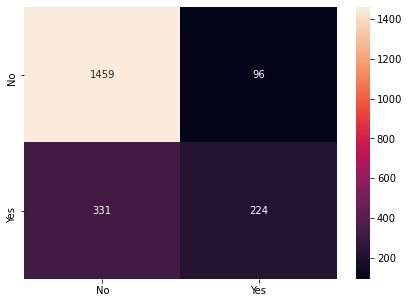

In [348]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


predictdt_y = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, predictdt_y, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

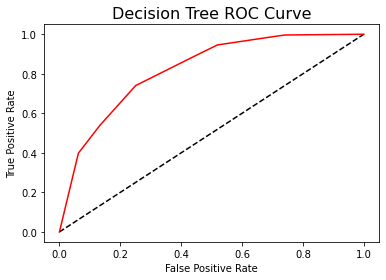

In [241]:
predictdt_y_prob = dTreeR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictdt_y_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show();

#### Displaying the Decision Tree

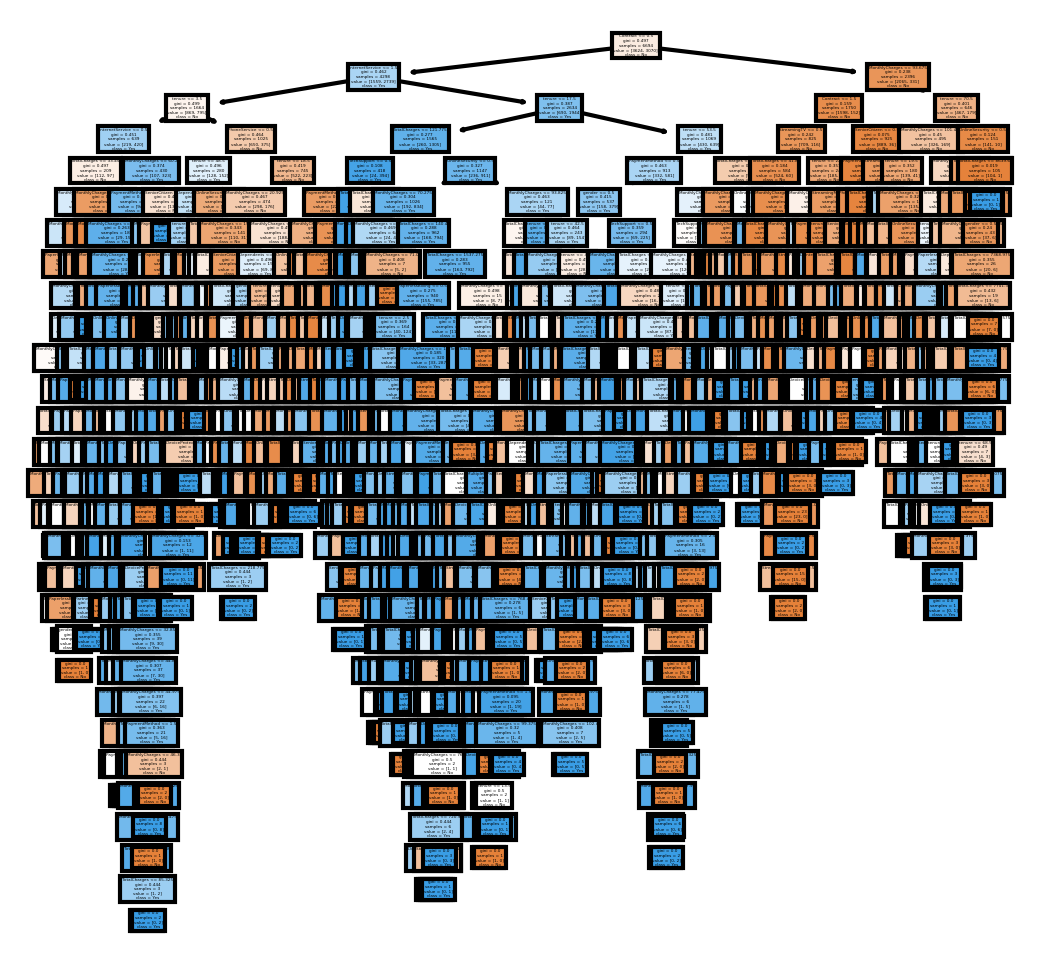

In [163]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

##   RandomForest Classifier

In [349]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8014218009478673


In [350]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1555
           1       0.67      0.48      0.56       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



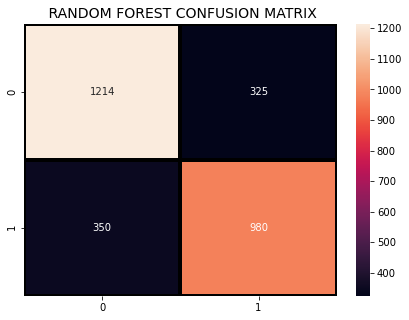

In [256]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

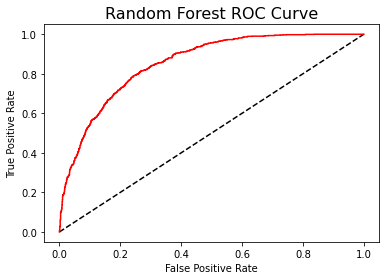

In [260]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

###                            Ensemble Technique - Bagging

In [351]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7696682464454976


<AxesSubplot:>

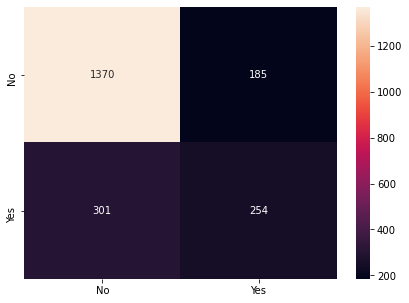

In [352]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Technique - AdaBoosting

In [353]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7928909952606635


<AxesSubplot:>

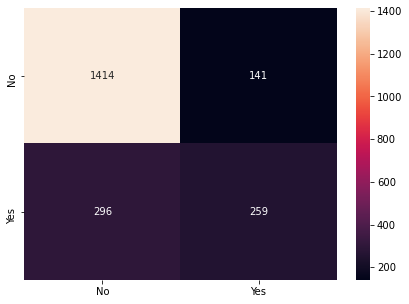

In [354]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

###                     Ensemble Technique - GradientBoost

In [355]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7995260663507109


<AxesSubplot:>

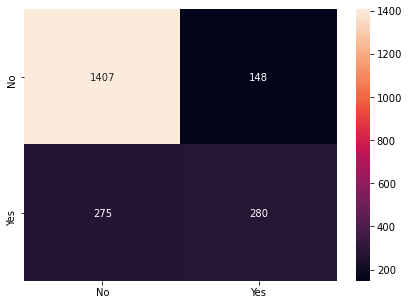

In [356]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Voting Classifier

In [357]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier(n_estimators=10, random_state=1)
clf4 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
clf5 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3), ('rf', clf4), ('gnb', clf5)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7962085308056872


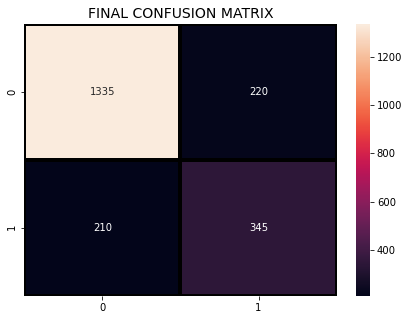

In [358]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

### Comparision of the Models



##### The accuracy of all the models is as follows -

Logistic Regression : 80.62%

SVM : 77.3%

Naive Bayes Classiefier : 77.3%

KNN: 72.39%

Decision Tree : 79.76%

Random Forest : 80.14%

## Select the final best trained model

### How to select the best model

The classifiers are not achieving higher accuracy scores (like > 95%) since it is not a sensitive field, it is acceptable for basic modelling. It seems difficult for the classifiers to identify a perfect decision boundary without sacrificing either precision or recall. This can be seen from the classification report.

The accuracy can be further increased by tuning techniques like using all possible hyper parameter combinations which will increase accuarcy.

If the telecom company wants to choose a classifier, it will have to make a tradeoff between the amount of revenue it wants to retain and the amount of revenue it is willing to spend on the customer retention programs to prevent churn. This tradeoff is a result of the tradeoff between precision and recall.

To retain more revenue, the company needs to choose a classifier that has HIGHER RECALL and LOWER PRECISION. However, this will result in HIGHER FALSE POSITIVES making the company include no-churn customers as well in the retention programs thereby increasing its spending.

On the other hand, if the company chooses to retain a decent amount of the revenue while not spending too much on the retention programs, it will have to choose a model with has a higher F1-score.

From all the above models, Logistic Regression and Random Forest have the best and similar accuarcies. They both have almost similar PRECISION but Logistic Regression has better RECALL and F1 SCORE.

#### Since our project objective is to  increase the focus on strategising customer retention,  we will go with Logistic Regression Model and it also has overall best accuarcy too.

# Pickle the selected model

By the process of pickling, we save the model for future use.

In [376]:
import pickle

In [377]:
best_model = LogisticRegression()

#Fitting model with training data
best_model.fit(X_df1, y_df1)

LogisticRegression()

In [378]:
pickle.dump(best_model, open('model.pkl','wb'))

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> STEP - 6

# Conclusion and improvisation

Customer churn is definitely bad to a firm ’s profit and business. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers' preferences and needs. This includes identifying customers who are at risk of churning and working to improve their satisfaction, making custom plans for different groups like age, income etc.

Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service and customer care is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

#### Suggestions on quality, quantity, variety, velocity, veracity on the data points collected for a better data analysis in future

Data was highly skewed in some variables like MonthlyCharges and Tenure. More data can be collected for a more uniform distribution.

Some blank cells were undetected by isnull() as it did not have NaN. A deeper look is needed while data collecting and cleaning.

Target balancing is also important for imbalanced data. Model building has to be done for upscaled data, downscaled data and original data and the accuracy is to be compared.

# <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea; text-align: center" > SUBMITTED BY - <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#000"> UTKARSH R. WILSON